১. প্রয়োজনীয় লাইব্রেরি ইমপোর্ট (পেশাদার স্টাইলে)

In [1]:
# ডেটা প্রসেসিং এবং ভিজ্যুয়ালাইজেশনের জন্য
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# মেশিন লার্নিং প্রি-প্রসেসিং এবং মডেলিং এর জন্য
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# রিগ্রেশন মডেল
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor

# মডেল মূল্যায়নের মেট্রিক
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# সতর্কবার্তা বন্ধ করা (optional, ডেভেলপমেন্টে ব্যবহার করা যায়)
import warnings
warnings.filterwarnings("ignore")

২. ডেটা লোড করা (পেশাদার ভাবে)

In [2]:
# CSV ফাইল থেকে ডেটা লোড
file_path = "https://drive.google.com/uc?export=download&id=1v7r-TvQ-bE63JbgVBGp7O3C2TULUwISo"
df = pd.read_csv(file_path)

# ডেটার প্রথম কয়েক সারি দেখা (ভালো অভ্যাস)
print(f"ডেটার আকার: {df.shape}")
print(df.head())

ডেটার আকার: (2018, 16)
         date gender  age address famsize   Pstatus  M_Edu  F_Edu    M_Job  \
0  29/04/2018      M   18   Rural     GT3  Together      3      2  At_home   
1  29/04/2018      F   19   Rural     LE3     Apart      0      4    Other   
2  29/04/2018      F   19   Rural     GT3  Together      0      3  Teacher   
3  29/04/2018      F   19   Rural     LE3     Apart      2      3  At_home   
4  29/04/2018      M   17   Rural     GT3  Together      1      1  At_home   

      F_Job relationship smoker  tuition_fee  time_friends  ssc_result  \
0    Farmer           No     No        71672             4        4.22   
1    Health          Yes     No        26085             5        3.47   
2  Services           No     No        40891             3        3.32   
3  Business           No     No        50600             2        4.57   
4    Farmer           No     No        62458             2        4.50   

   hsc_result  
0        3.72  
1        2.62  
2        2.56  

৩. কলামের নাম ঠিক করা (পরিষ্কার করা)

In [3]:
# কলামের নাম সঠিক ও পরিষ্কার করা
df.columns = [
    'date', 'st_gender', 'st_age', 'st_address', 'st_fam_size', 'pstatus',
    'm_edu', 'f_edu', 'm_job', 'f_job', 'st_relationship', 'smoker',
    'tuition_fee', 'time_with_friends', 'ssc_result', 'hsc_result'
]

# অপ্রয়োজনীয় 'date' কলাম বাদ দেওয়া (যদি মডেলে লাগে না)
if 'date' in df.columns:
    df.drop(columns=['date'], inplace=True)

print(f"কলামের সংখ্যা: {len(df.columns)}")
print(df.columns)

কলামের সংখ্যা: 15
Index(['st_gender', 'st_age', 'st_address', 'st_fam_size', 'pstatus', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'st_relationship', 'smoker', 'tuition_fee',
       'time_with_friends', 'ssc_result', 'hsc_result'],
      dtype='object')


Separate X and y

In [6]:
X = df.drop('hsc_result',axis=1)
y = df['hsc_result']

 ৪. ডেটা সংক্ষিপ্ত বিবরণ (প্রাথমিক EDA)

In [7]:
# ডেটার আকার
print(f"মোট রো (rows): {df.shape[0]}, কলাম (columns): {df.shape[1]}")

numeric_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns
print("নিউমেরিক ফিচারগুলো:", numeric_features)
print("ক্যাটাগরিক্যাল ফিচারগুলো:", categorical_features)


মোট রো (rows): 2018, কলাম (columns): 15
নিউমেরিক ফিচারগুলো: Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')
ক্যাটাগরিক্যাল ফিচারগুলো: Index(['st_gender', 'st_address', 'st_fam_size', 'pstatus', 'm_job', 'f_job',
       'st_relationship', 'smoker'],
      dtype='object')


pipeline

In [8]:
#for numerical features

num_transformer = Pipeline (
    steps = [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

For categorical feature

In [9]:
cat_transformer = Pipeline( steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
] )

In [10]:
#combine them
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer,numeric_features),
        ('cat',cat_transformer,categorical_features)
    ]
    )

#split them

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

Ensemble - boosting, stacking

In [12]:
#base learner

reg_lr = LinearRegression()
reg_rf = RandomForestRegressor( n_estimators=100, random_state=42 )
reg_gb = GradientBoostingRegressor( n_estimators=100 , random_state=42 )

In [13]:
#Voting regressor

voting_reg = VotingRegressor(
    estimators= [
        ('lr', reg_lr),
        ('rf',reg_rf),
        ('gb', reg_gb)
    ]
)

In [14]:
#stacking

stacking_reg = StackingRegressor(
    estimators= [
        ('rf',reg_rf),
        ('gb', reg_gb)
    ],
    final_estimator= Ridge() #the meta learner
)

## Model Training


In [15]:
#dictionary of all model

model_to_train = {
    'Linear Regression' : reg_lr,
    'Random Forest' : reg_rf,
    'Gradient Boosting': reg_gb,
    'Voting Ensemble ' : voting_reg,
    'Stacking Ensemble ' : stacking_reg

}

In [16]:
# ============================
# মডেল ট্রেনিং এবং মূল্যায়ন (Training & Evaluation)
# ============================

# একটি লিস্ট তৈরি করা হচ্ছে যেখানে প্রতিটি মডেলের নাম ও মূল্যায়ন মেট্রিক সংরক্ষণ করা হবে
result = []

# আমাদের প্রস্তুত করা মডেলগুলোর ডিকশনারি থেকে একে একে মডেল নিয়ে আসা হচ্ছে
for name, model in model_to_train.items():

    # --------------------------
    # ১. পূর্ণ পাইপলাইন তৈরি
    # --------------------------
    # প্রতিটি মডেলের সাথে প্রি-প্রসেসিং (preprocessor) যুক্ত করে একটি পূর্ণ পাইপলাইন তৈরি করা হচ্ছে
    pipe = Pipeline(
        [
            ('preprocessor', preprocessor),  # ডেটা ক্লিনিং, ইমপিউট, স্কেলিং, এনকোডিং ইত্যাদি
            ('model', model)                 # আমাদের রিগ্রেশন মডেল (যেমন: Linear, RF, GB ইত্যাদি)
        ]
    )

    # --------------------------
    # ২. মডেল ট্রেনিং (ফিট)
    # --------------------------
    # ট্রেনিং ডেটা (X_train, y_train) দিয়ে মডেলটি ট্রেন করা হচ্ছে
    pipe.fit(X_train, y_train)

    # --------------------------
    # ৩. পূর্বাভাস (প্রেডিকশন)
    # --------------------------
    # টেস্ট ডেটা (X_test) দিয়ে পূর্বাভাস (y_pred) তৈরি করা হচ্ছে
    y_pred = pipe.predict(X_test)

    # --------------------------
    # ৪. মডেল মূল্যায়ন (Evaluation Metrics)
    # --------------------------
    # নিচের তিনটি মেট্রিক ব্যবহার করে মডেলের পারফরম্যান্স মূল্যায়ন করা হচ্ছে:

    # R² Score (R-Squared): মডেলটি কতটা ভালো ভবিষ্যদ্বাণী করেছে (0 থেকে 1, যত বেশি তত ভালো)
    r2 = r2_score(y_test, y_pred)

    # RMSE (Root Mean Squared Error): ভবিষ্যদ্বাণীর গড় বর্গমূল ত্রুটি (যত কম তত ভালো)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # MAE (Mean Absolute Error): ভবিষ্যদ্বাণীর গড় পরম ত্রুটি (যত কম তত ভালো)
    mae = mean_absolute_error(y_test, y_pred)

    # --------------------------
    # ৫. রেজাল্ট সংগ্রহ
    # --------------------------
    # প্রতিটি মডেলের নাম ও মূল্যায়ন মেট্রিক গুলো একটি ডিকশন হিসেবে সংরক্ষণ করা হচ্ছে
    result.append({
        "Model": name,        # মডেলের নাম (যেমন: Linear Regression, Random Forest, ...)
        "R2 Score": r2,       # R² স্কোর
        "RMSE": rmse,         # RMSE ভ্যালু
        "MAE": mae            # MAE ভ্যালু
    })

# --------------------------
# ৬. রেজাল্ট টেবিল তৈরি ও সাজানো
# --------------------------
# সব মডেলের রেজাল্ট গুলোকে একটি Pandas DataFrame এ রূপান্তর করা হচ্ছে
results_df = pd.DataFrame(result)

# এখন সেই DataFrame কে R2 Score অনুযায়ী সেরা থেকে খারাপ ক্রমে সাজানো হচ্ছে
# (R2 Score যত বেশি তত ভালো মডেল)
results_df = results_df.sort_values("R2 Score", ascending=False)

# --------------------------
# ৭. রেজাল্ট প্রিন্ট করা
# --------------------------
# টেবিলটি কনসোলে প্রিন্ট করা হচ্ছে — যাতে দেখা যায় কোন মডেলটি সেরা
print(results_df)

                Model  R2 Score      RMSE       MAE
4  Stacking Ensemble   0.959566  0.123105  0.098696
2   Gradient Boosting  0.959565  0.123107  0.098902
3    Voting Ensemble   0.957528  0.126169  0.100838
1       Random Forest  0.950248  0.136556  0.108201
0   Linear Regression  0.945920  0.142371  0.111376


## Visualization


সেরা মডেল: Stacking Ensemble 


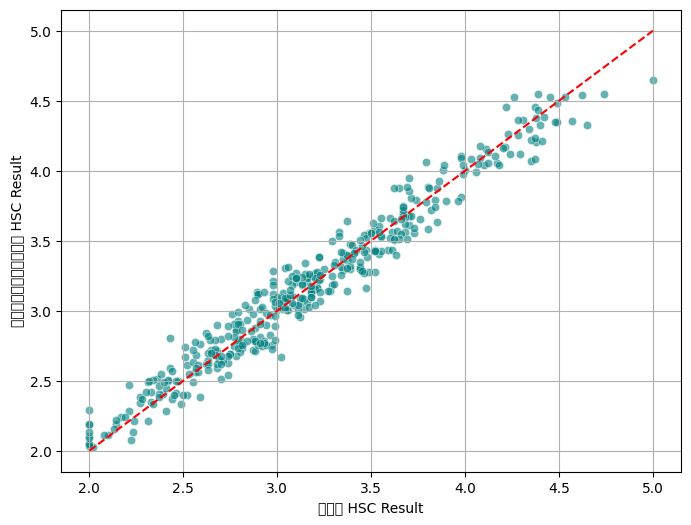

In [17]:
# ============================
# সেরা মডেল নির্বাচন করা
# ============================

# results_df টেবিল থেকে সেই মডেলটি নিয়ে আসা যার R2 Score সবচেয়ে বেশি
best_model_name = results_df.iloc[0]['Model']  # সেরা মডেলের নাম
best_model_obj = model_to_train[best_model_name]  # সেই মডেলের অবজেক্ট

print(f"সেরা মডেল: {best_model_name}")

# ============================
# ফাইনাল পাইপলাইন তৈরি করা (Preprocessor + Best Model)
# ============================

final_pipe = Pipeline([
    ('preprocessor', preprocessor),  # আমাদের আগে তৈরি করা প্রি-প্রসেসিং পাইপলাইন
    ('model', best_model_obj)        # সেরা মডেলের অবজেক্ট
])

# ============================
# ট্রেনিং ডেটায় মডেল ট্রেন করা
# ============================

final_pipe.fit(X_train, y_train)

# ============================
# টেস্ট ডেটায় পূর্বাভাস দেওয়া
# ============================

y_final_pred = final_pipe.predict(X_test)

# ============================
# ভিজ্যুয়ালাইজেশন: আসল vs পূর্বাভাসিত রেজাল্ট
# ============================

plt.figure(figsize=(8, 6))  # গ্রাফের সাইজ 8x6 ইঞ্চি

# স্ক্যাটার প্লট: আসল ভ্যালু (x-অক্ষ) vs পূর্বাভাসিত ভ্যালু (y-অক্ষ)
sns.scatterplot(
    x=y_test,
    y=y_final_pred,
    alpha=0.6,           # পয়েন্টগুলো অর্ধ-স্বচ্ছ
    color='teal'         # রঙ সবুজের মতো (teal)
)

# একটি 45° লাইন যোগ করা হলো — যা আসল ও পূর্বাভাস যদি একই হয় তাহলে পয়েন্টগুলো এই লাইনে থাকবে
plt.plot([2, 5], [2, 5], color="red", linestyle='--')

# অক্ষের নাম (Label)
plt.xlabel("আসল HSC Result")     # X অক্ষের নাম
plt.ylabel("পূর্বাভাসিত HSC Result")  # Y অক্ষের নাম

# গ্রিড দেখানো
plt.grid(True)

# গ্রাফ দেখানো
plt.show()

## Cross Valiadation

In [18]:
from sklearn.model_selection import cross_val_score

In [20]:
rf_pipeline = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',RandomForestRegressor(n_estimators=100,random_state=42))

     ]

  )

## cross validation

In [21]:
# 5 fold cv

cv_scores = cross_val_score( rf_pipeline,X_train,y_train,cv=5, scoring='neg_mean_squared_error' )
cv_rmse = np.sqrt(-cv_scores)

print(cv_rmse)

[0.13825617 0.14202924 0.15369812 0.14773708 0.12940278]


In [22]:
print(cv_rmse.mean())

0.14222467953735998


In [23]:
print(cv_rmse.std())

0.00827302663832195


## Stacking Ensemble

In [24]:
stacking_pipeline = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',stacking_reg)

     ]

  )

In [25]:
cv_scores = cross_val_score(
    stacking_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs = -1 #use all processor core , to speed it up
    )

stacking_rmse = np.sqrt(-cv_scores)

print(stacking_rmse)
print(stacking_rmse.mean())
print(stacking_rmse.std())

[0.12742194 0.1342731  0.13336693 0.13391606 0.11927744]
0.12965109379515954
0.00576093844453546


In [29]:
print('tanvir')

tanvir


# Grid search cv

In [30]:
rf_pipeline = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',RandomForestRegressor(n_estimators=100,random_state=42))

     ]

  )

In [31]:
#define the grid

param_grid = {
    'model__n_estimators' : [100,200] ,
    'model__max_depth': [None,10,20],
    'model__min_samples_split' : [2,5]
}

In [33]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator = rf_pipeline,
    param_grid = param_grid,
    cv = 5 ,
    scoring = 'neg_root_mean_squared_error',
    n_jobs =-1,
    verbose = 2

)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['st_gender', 'st_address', 'st_fam_size', 'pstatus', 'm_job', 'f_job',
       'st_relationship', 'smoker'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [34]:
print(-grid_search.best_score_)

0.14145800733122194


In [35]:
print(grid_search.best_params_)

{'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 200}


# Randomized Search cv

In [36]:
from scipy.stats import randint

my_dist = randint(1,10)

print(my_dist.rvs())
print(my_dist.rvs())
print(my_dist.rvs(size=5))

5
8
[9 1 8 3 6]


In [38]:
param_dist = {
    'model__n_estimators' : randint(100,500) ,
    'model__max_depth': [None,10,20],
    'model__min_samples_split' : randint(1,10)
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator = rf_pipeline,
    param_distributions = param_dist,
    n_iter=1,
    cv = 5 ,
    scoring = 'neg_root_mean_squared_error',
    n_jobs =-1,
    verbose = 2,
    random_state = 42
)

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy=...
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 20],
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c5cb1a5eff0>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c5cb1a5e3f0>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [40]:
print( -random_search.best_score_ )

0.14084993368592363


In [41]:
print( random_search.best_params_ )

{'model__max_depth': 20, 'model__min_samples_split': 4, 'model__n_estimators': 448}


# Save Model